In [1]:
from adaptation import TEDxMultilingualDatasetEnEl,OptimalAdaptation


/home/plitsis/anaconda3/envs/planv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'ot'

In [2]:
data = TEDxMultilingualDatasetEnEl()
# X_el, X_en = data.get_features()
feats_names=data.df_feats_el.columns
X_el = data.df_feats_el.to_numpy()
X_en = data.df_feats_en.to_numpy()


In [6]:
optimal_transport = OptimalAdaptation(algorithm="emd")

X_el_transformed = optimal_transport.fit_and_transform(X_el, X_en)

In [7]:
len(X_el)

228

<AxesSubplot: ylabel='Density'>

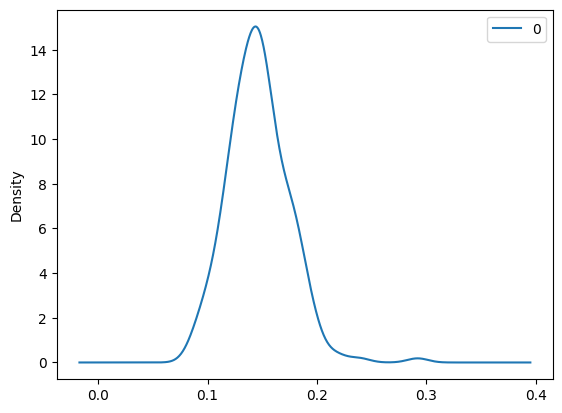

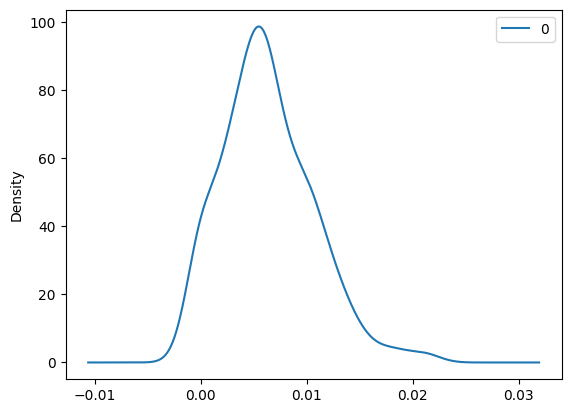

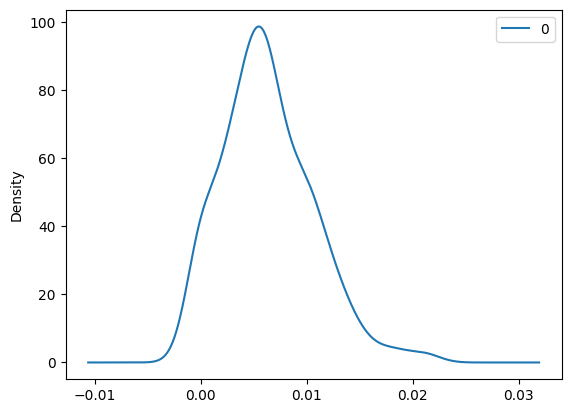

In [8]:
import pandas as pd

ax=pd.DataFrame(X_el[:,1]).plot(kind="density")
pd.DataFrame(X_en[:,1]).plot(kind="density")
pd.DataFrame(X_el_transformed[:,1]).plot(kind="density")

In [9]:
from feature_extraction import DatasetFeatureExtractor
from feature_names import FEATURES_NAMES
utterance_column_name="asr_transcription_whisper_target"
csv_english="/home/plitsis/planv/datasets/ab_english/all_data.csv"
df_en=pd.read_csv(csv_english)

fe_en = DatasetFeatureExtractor(
    df_en,
    language="en",
    utterance_column=utterance_column_name,
    conllu_column=utterance_column_name+"_conllu",
    extract_conllu=False,
)
df_feats_en = fe_en.calculate_features_all_speakers()
X_en_ab=df_feats_en[FEATURES_NAMES].to_numpy()

df_feats_en_control=df_feats_en[df_feats_en["control"]==True]
X_en_ab_control=df_feats_en_control[FEATURES_NAMES].to_numpy()
df_feats_en_pwa=df_feats_en[df_feats_en["control"]==False]
X_en_ab_pwa=df_feats_en_pwa[FEATURES_NAMES].to_numpy()

In [10]:
def df_wab_aq_category(df):
    df.loc[(pd.to_numeric(df['WAB_AQ'])>= 0) & (pd.to_numeric(df['WAB_AQ'])<=25), 'WAB_AQ_category'] = 'Very severe'
    df.loc[(pd.to_numeric(df['WAB_AQ'])> 25) & (pd.to_numeric(df['WAB_AQ'])<=50), 'WAB_AQ_category'] = 'Severe'
    df.loc[(pd.to_numeric(df['WAB_AQ'])> 50) & (pd.to_numeric(df['WAB_AQ'])<=75), 'WAB_AQ_category'] = 'Moderate'
    df.loc[(pd.to_numeric(df['WAB_AQ'])> 75) , 'WAB_AQ_category'] = 'Mild'
    df.loc[np.isnan(pd.to_numeric(df['WAB_AQ'])) , 'WAB_AQ_category'] = 'Unknown'
    return df

In [11]:
csv_greek="/home/plitsis/planv/datasets/planv_all.csv"
import numpy as np
df_el=pd.read_csv(csv_greek)
#WAB_AQ_category -> aphasia type 

df_el=df_wab_aq_category(df_el)


fe_el = DatasetFeatureExtractor(
    df_el,
    language="el",
    utterance_column=utterance_column_name,
    conllu_column=utterance_column_name+"_conllu",
    extract_conllu=False,
)
df_feats_el = fe_el.calculate_features_all_speakers()
X_el_planv=df_feats_el[FEATURES_NAMES].to_numpy()


df_feats_el_control=df_feats_el[df_feats_el["control"]==True]
X_el_ab_control=df_feats_el_control[FEATURES_NAMES].to_numpy()
df_feats_el_pwa=df_feats_el[df_feats_el["control"]==False]
X_el_ab_pwa=df_feats_el_pwa[FEATURES_NAMES].to_numpy()

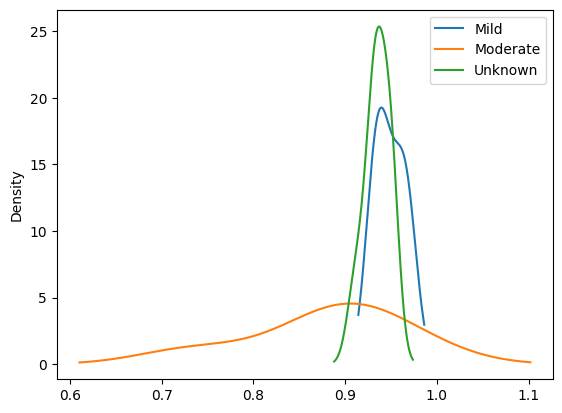

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure()
for cat in df_feats_el["WAB_AQ_category"].unique():
    df_feats_el[df_feats_el["WAB_AQ_category"]==cat][FEATURES_NAMES].iloc[:,21].plot(kind="density",label=cat)
    plt.legend()


# ax=df_feats_en[].plot(kind="density")
# pd.DataFrame(X_el_planv[:,2]).plot(kind="density",ax=ax)

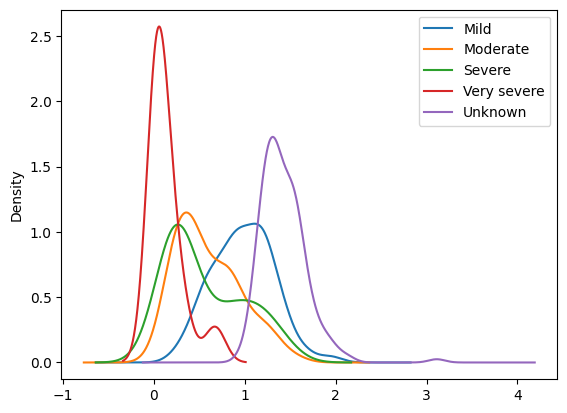

In [13]:
df_feats_en=df_wab_aq_category(df_feats_en)


plt.figure()
for cat in df_feats_en["WAB_AQ_category"].unique():
    
    df_feats_en[df_feats_en["WAB_AQ_category"]==cat][FEATURES_NAMES].iloc[:,7].plot(kind="density",label=cat)
    plt.legend()

<AxesSubplot: ylabel='Density'>

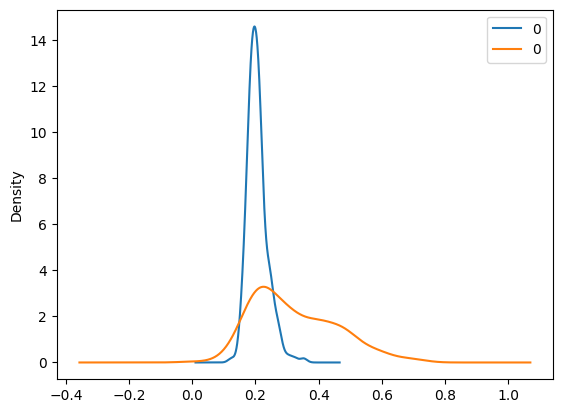

In [60]:
ax=pd.DataFrame(X_en_ab_control[:,2]).plot(kind="density")
pd.DataFrame(X_en_ab_pwa[:,2]).plot(kind="density",ax=ax)

In [47]:
import numpy as np

X_el_transformed = optimal_transport.transform(X_el_planv)
# def give_cdf(x):
#     x=np.sort(x)
#     y=np.arange(len(x))/float(len(x))
#     return x,y

# feat_to_plot=2
# x_el,y_el = give_cdf(X_el[:,feat_to_plot])
# x_en,y_en = give_cdf(X_en[:,feat_to_plot])
# x_el_t,y_el_t=give_cdf(X_el_transformed[:,feat_to_plot])
# x_en_ab,y_en_ab = give_cdf(X_en_ab[:,feat_to_plot])

In [49]:
pd.DataFrame(X_el_transformed[:,2])

0
0   0.074406
1   0.083695
2   0.073378
3  -0.133164
4   0.002376
5   0.061782
6  -0.373999
7   0.044244
8  -0.007056
9   0.066190
10  0.077360
11  0.081615
12  0.067131
13  0.058217
14  0.074296
15  0.071651
16  0.063804
17  0.075546
18  0.045347
19  0.067302
20  0.069844

In [46]:
X_el_transformed[:,5]

array([0.01216551, 0.01038982, 0.01024689, 0.02152442, 0.01087043,
       0.00906543, 0.01599355, 0.00558762, 0.00489533, 0.01151795,
       0.01429473, 0.01534331, 0.01153728, 0.01558969, 0.01875294,
       0.00852691, 0.01680317, 0.01511048, 0.0210859 , 0.01345311,
       0.01661014, 0.01673528, 0.01082453, 0.01050277, 0.00913697,
       0.01093226, 0.00384783, 0.01479372, 0.00902205, 0.00970258,
       0.00281859, 0.00958971, 0.01501346, 0.00719966, 0.01606716,
       0.01269834, 0.01237149, 0.01221109, 0.00604582, 0.01073664,
       0.01272086, 0.0092648 , 0.01848184, 0.00737231, 0.01569668,
       0.01910849, 0.00929421, 0.0137331 , 0.00913352, 0.01380483,
       0.01885508, 0.00014839, 0.01176296])

In [18]:
optimal_transport = OptimalAdaptation(algorithm="earth")

X_el_transformed = optimal_transport.fit_and_transform(X_el, X_en)
X_el_t = optimal_transport.transform(X_el_planv)


In [19]:
X_el.shape

(228, 27)

<AxesSubplot: ylabel='Density'>

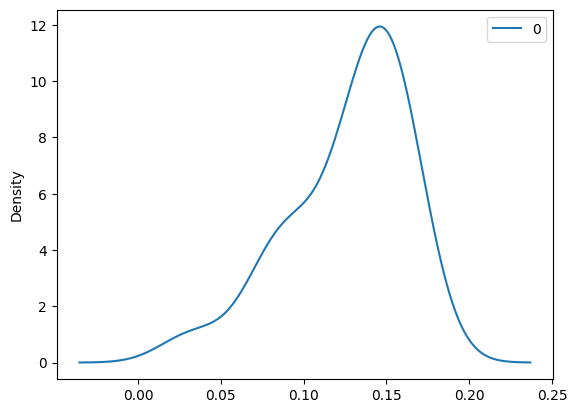

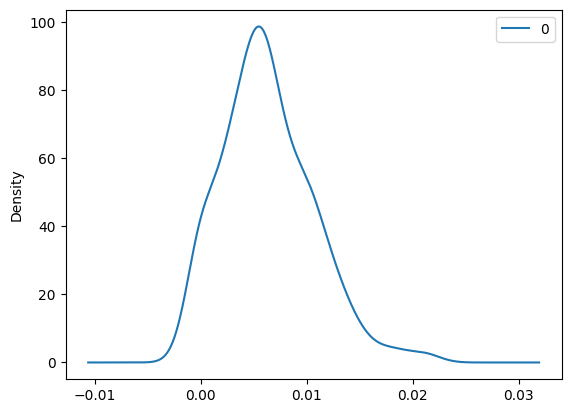

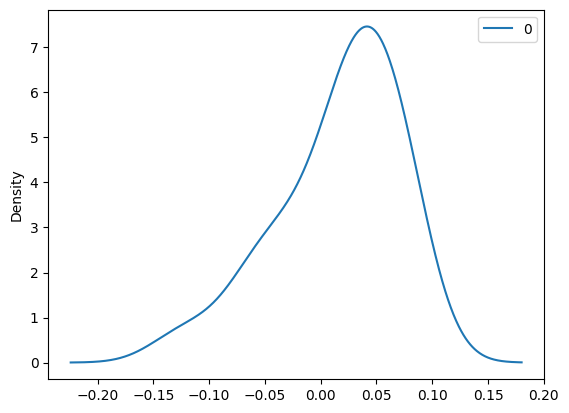

In [20]:

ax=pd.DataFrame(X_el_planv[:,1]).plot(kind="density")
pd.DataFrame(X_en[:,1]).plot(kind="density")
pd.DataFrame(X_el_t[:,1]).plot(kind="density")

In [22]:
from adapt.instance_based import KMM

2022-12-07 16:54:26.043863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 16:54:26.994179: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-07 16:54:26.994244: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-07 16:54:26.994249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv